# Demo

## Preparing

You need to provide a series of folders, holding the photos. e.g. /home/mike/Documents/Research/bee/photos2021/%s/system001, etc.. You also need to write a config file. This has, initially, two sections:

- dists - a list of distances between items
- items - a dictionary of items (heights (for cameras), angles (for cameras) and coords). (more info can be added).

An initial config file will have, as an example:

    {
        "dists": [
            {
                "from": "cam3",
                "to": "cam1",
                "dist": 18.4
            },
            {
                "from": "cam3",
                "to": "m10",
                "dist": 12.1
            },
            {
                "from": "cam3",
                "to": "m00",
                "dist": 17.2
            },
                    :
                    : etc
                    :
        ],
        "items": {
            "cam2": {
                "height": 1.9,
                "angle": 6.31,
                "coords": [
                    0,
                    12,
                    0
                ]
            },            
            "m09": {
                "coords": [
                    7,
                    0,
                    0
                ]
            },
            "m02": {
                "coords": [
                    20,
                    2,
                    0
                ]
            },
            "nest": {
                "coords": [
                    20,
                    10,
                    0
                ]
            },
                :
                :etc
                :
        }
    }

There are several sources of information the alignment algorithm uses:

1. The coords associated with each item give a rought (e.g. within 5 metres) idea of where things are.
2. The distances between items are accurate to 50cm, so after optimising using these the coordinates are correct to within about a metre (in x,y anyway).
3. The images themselves are searched using the `find_markers()` method, to find the tops and the bottom of the markers.
4. Additional landmarks are identified by the user, using the web interface.

There are two steps to the alignment algorithm:

1. Improve the estimates of the coords of the objects by using the distances between them (and using the coords in the config file as initial positions). This will get them roughly in the correct place (within a metre), but won't help with camera orientations.
2. Optimise all the locations and camera orientations etc, using the imgcoords computed by finding the markers in the images and from the imgcoords in the items in the config file.


This program aligns the images etc, but it now depends on manually identifying the bee in the photos. For that use:

    python server.py --imgpath /home/mike/Documents/Research/bee/photos2021/20thJuly

In [2]:
import alignment
import numpy as np
from copy import deepcopy
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2,suppress=True)

def prep(dayst,timefromst,timetost,configst):
    """
    dayst = day string "20thJuly" (must match folder)
    timefromst, timetost = e.g. '13:58:00','13:58:59'
    configst = config filename, e.g. config000000.json.
    """
    image_filenames = {}
    for camidx in [1,2,3,4]:
        image_filenames['cam%d' % camidx] = alignment.grab_photos_in_timerange('/home/mike/Documents/Research/bee/photos2021/%s/system00%d' % (dayst,camidx),timefromst,timetost)
    a = alignment.Align('/home/mike/Documents/Research/bee/photos2021/%s/%s' % (dayst,configst),image_filenames)    
    #a.found = {}
    a.load_photos_for_alignment(False)
    a.find_markers()#debug=True,threshold=0.88,refresh_cache=True)#refresh_cache=True,threshold=0.88)
    a.load_photos_for_alignment(True)
    a.find_markers()#debug=True,threshold=0.88,refresh_cache=True)#refresh_cache=True,threshold=0.88)
    
    a.optimise_positions()
    
    fov, ret = a.estimate_fov() 
    print("Estimated FOV: %0.1f degrees" % np.rad2deg(fov))
    a.build_newitems()
    a.generate_alignment(200)#,refresh_cache=True)
    return a

In [3]:
a = prep('20thJuly','13:58:00','13:58:59','config000000.json')

Trying to load from cache (cache/found_cache_488993088217005931884916559248056991697895612114.pkl)
Trying to load from cache (cache/found_cache_495644491382106101572932179368880231716807032807.pkl)
Trying to load from cache (cache/found_cache_561176424757159004320876823002232834490810007786.pkl)
Trying to load from cache (cache/found_cache_232262321704485297858868094324759323526804870482.pkl)
Trying to load from cache (cache/found_cache_1274829278731846147986828743320540924804757925953.pkl)
Trying to load from cache (cache/found_cache_405618279165676041551605623265213909585445455494.pkl)
Trying to load from cache (cache/found_cache_304478011998845253045659555878010926215611062409.pkl)
Trying to load from cache (cache/found_cache_967346039333954414453007365603989740662921907388.pkl)
Optimising Locations
Estimated FOV: 47.6 degrees
Trying to load from cache (cache/camera_alignment_cache_173058047999808988164295136465589523588349610210.pkl)
Worst position 6 pixels away.


In [20]:
a = prep('20thJuly','10:59:50','11:00:05','config000001.json') #not this one

Trying to load from cache (cache/found_cache_21664576957312368935550130070927927691831940565.pkl)
Trying to load from cache (cache/found_cache_1427847157075504242264395864363833635176570266408.pkl)
Trying to load from cache (cache/found_cache_505392846766239630996700350695457341696002835970.pkl)
Trying to load from cache (cache/found_cache_1059667046784252491491341719680188212944476216480.pkl)
Trying to load from cache (cache/found_cache_113760290868614979893999829318060394568752822785.pkl)
Trying to load from cache (cache/found_cache_730991289299970003920013411546002808310244711858.pkl)
Trying to load from cache (cache/found_cache_694888333170881432532500431821182433123928711424.pkl)
Trying to load from cache (cache/found_cache_222211238302438579884231248439334048837289110042.pkl)
Optimising Locations
Estimated FOV: 44.1 degrees
Trying to load from cache (cache/camera_alignment_cache_526749947957846367749923094908234805680057230379.pkl)
Worst position 9 pixels away.


In [46]:
a = prep('29thJuly','09:41:40','09:42:40','config000002.json')

Trying to load from cache (cache/found_cache_1035600871160720444605365691042148675939349773410.pkl)
Trying to load from cache (cache/found_cache_73195179244077864460855067848732222797863193299.pkl)
Trying to load from cache (cache/found_cache_771346334094519678791949064736223368672111912194.pkl)
Trying to load from cache (cache/found_cache_1367880445452162169520379848968542490262902061863.pkl)
Trying to load from cache (cache/found_cache_707007537709049337226455561357982958658905488924.pkl)
Trying to load from cache (cache/found_cache_978527661205217313114051003854733164708282123959.pkl)
Trying to load from cache (cache/found_cache_152144143781406813471504234338662630206751375040.pkl)
Trying to load from cache (cache/found_cache_1320482889863075348982396476576086286038761525268.pkl)
Optimising Locations
Estimated FOV: 50.8 degrees
Trying to load from cache (cache/camera_alignment_cache_567160309915509229159560994332693980102682408815.pkl)
Worst position 8 pixels away.


In [74]:
a = prep('29thJuly','11:31:19','11:31:35','config000003.json') #issues with timestamps!

Trying to load from cache (cache/found_cache_457104470062367164541422065568218538617837223139.pkl)
Trying to load from cache (cache/found_cache_576729865952187690767436317980509754428391709845.pkl)
Trying to load from cache (cache/found_cache_879719387844864761030388865680861544336554066357.pkl)
Trying to load from cache (cache/found_cache_1022323136562284566482443611345021574628897045748.pkl)
Trying to load from cache (cache/found_cache_1346183890387799511839128378752603213946388632319.pkl)
Trying to load from cache (cache/found_cache_1288854702868747433226278552249149238463111329755.pkl)
Trying to load from cache (cache/found_cache_833536941778769779474823184517406745716929345204.pkl)
Trying to load from cache (cache/found_cache_1353712695173281719265658944215559598914157825606.pkl)
Optimising Locations
Estimated FOV: 54.1 degrees
Trying to load from cache (cache/camera_alignment_cache_1220741485602378860516193237500086158050679601591.pkl)
Worst position 13 pixels away.


In [55]:
a = prep('29thJuly','11:41:26','11:42:06','config000003.json') #use same config

Trying to load from cache (cache/found_cache_1250383117127244925788415961453555020489402585817.pkl)
Trying to load from cache (cache/found_cache_1347233831525664648816404325396603014880462837139.pkl)
Trying to load from cache (cache/found_cache_601420616029988592761502862096030971281434770371.pkl)
Trying to load from cache (cache/found_cache_1229206725694712522566928657525539693159317069645.pkl)
Trying to load from cache (cache/found_cache_12463845056628364814261039563165470342069931978.pkl)
Trying to load from cache (cache/found_cache_548901596732567717735257356438188373840675498286.pkl)
Trying to load from cache (cache/found_cache_1320362089445808108497955997012510805106412318165.pkl)
Trying to load from cache (cache/found_cache_1238994391357020476397281561624198122095355443347.pkl)
Optimising Locations
Estimated FOV: 51.0 degrees
Trying to load from cache (cache/camera_alignment_cache_1166557266504563950297036058552853437071678876069.pkl)
Worst position 9 pixels away.


In [34]:
a = prep('29thJuly','11:52:48','11:53:08','config000003.json') #use same config

Trying to load from cache (cache/found_cache_1052208163549413712109486734302123384161339499240.pkl)
Trying to load from cache (cache/found_cache_1014705427227737638478939207570997387357614588569.pkl)
Trying to load from cache (cache/found_cache_1250786252529869619760438069834635222909625464737.pkl)
Trying to load from cache (cache/found_cache_856971812707251038860130342714121134923164310989.pkl)
Trying to load from cache (cache/found_cache_304634538079028959202471498760740198909618005434.pkl)
Trying to load from cache (cache/found_cache_422887306503318162857021182626645322792765635833.pkl)
Trying to load from cache (cache/found_cache_1002360514015304245893520441155490490949357028513.pkl)
Trying to load from cache (cache/found_cache_195936375754362897900536344207284266905042394889.pkl)
Optimising Locations
Estimated FOV: 45.6 degrees
Trying to load from cache (cache/camera_alignment_cache_1112435404640265556556926780096340929735552956998.pkl)
Worst position 13 pixels away.


## 2. Check Alignment

You might find that some of the posts haven't been found, also it might be worth adding other landmarks (e.g. the nest itself). To add these manaully open the server, e.g.

    python server.py --imgpath /home/mike/Documents/Research/bee/photos2021/29thJuly/ --config config000002.json

and go to the appropriate datetime, e.g: 09:41:40 and select the camera.

Then, on the image, zoom in on a landmark and shift-leftclick a landmark point (e.g. the top of m02) and write in "m02_top" as the landmark. You will also need to enter its rough coords (e.g. 21,13,3) or enter the name of another landmark it is associated with (e.g. nest) or leave it as 'skip'.

One might also add other landmarks, like "nestfrontleft" for the top left corner of the nest.

You may need to check/correct the config file. For example, the "nestfrontleft" item has this entry:

        "nestfrontleft": {
            "imgcoords": {
                "cam2": [
                    1197,
                    1196
                ],
                "cam3": [
                    992,
                    1101
                ],
                "cam4": [
                    1732,
                    982
                ]
            }
        },
    

/home/mike/Documents/Research/beelabel/labelling/alignment.py:648: RuntimeWarning: invalid value encountered in true_divide
  res = np.array([1024+1024*(-pvec[:,1]/pvec[:,0])/self.hfovw,(1024+1024*(pvec[:,2]/pvec[:,0]/self.vfovw))*0.75]).T
/home/mike/Documents/Research/beelabel/labelling/alignment.py:648: RuntimeWarning: invalid value encountered in true_divide
  res = np.array([1024+1024*(-pvec[:,1]/pvec[:,0])/self.hfovw,(1024+1024*(pvec[:,2]/pvec[:,0]/self.vfovw))*0.75]).T
/home/mike/Documents/Research/beelabel/labelling/alignment.py:648: RuntimeWarning: invalid value encountered in true_divide
  res = np.array([1024+1024*(-pvec[:,1]/pvec[:,0])/self.hfovw,(1024+1024*(pvec[:,2]/pvec[:,0]/self.vfovw))*0.75]).T
/home/mike/Documents/Research/beelabel/labelling/alignment.py:648: RuntimeWarning: invalid value encountered in true_divide
  res = np.array([1024+1024*(-pvec[:,1]/pvec[:,0])/self.hfovw,(1024+1024*(pvec[:,2]/pvec[:,0]/self.vfovw))*0.75]).T


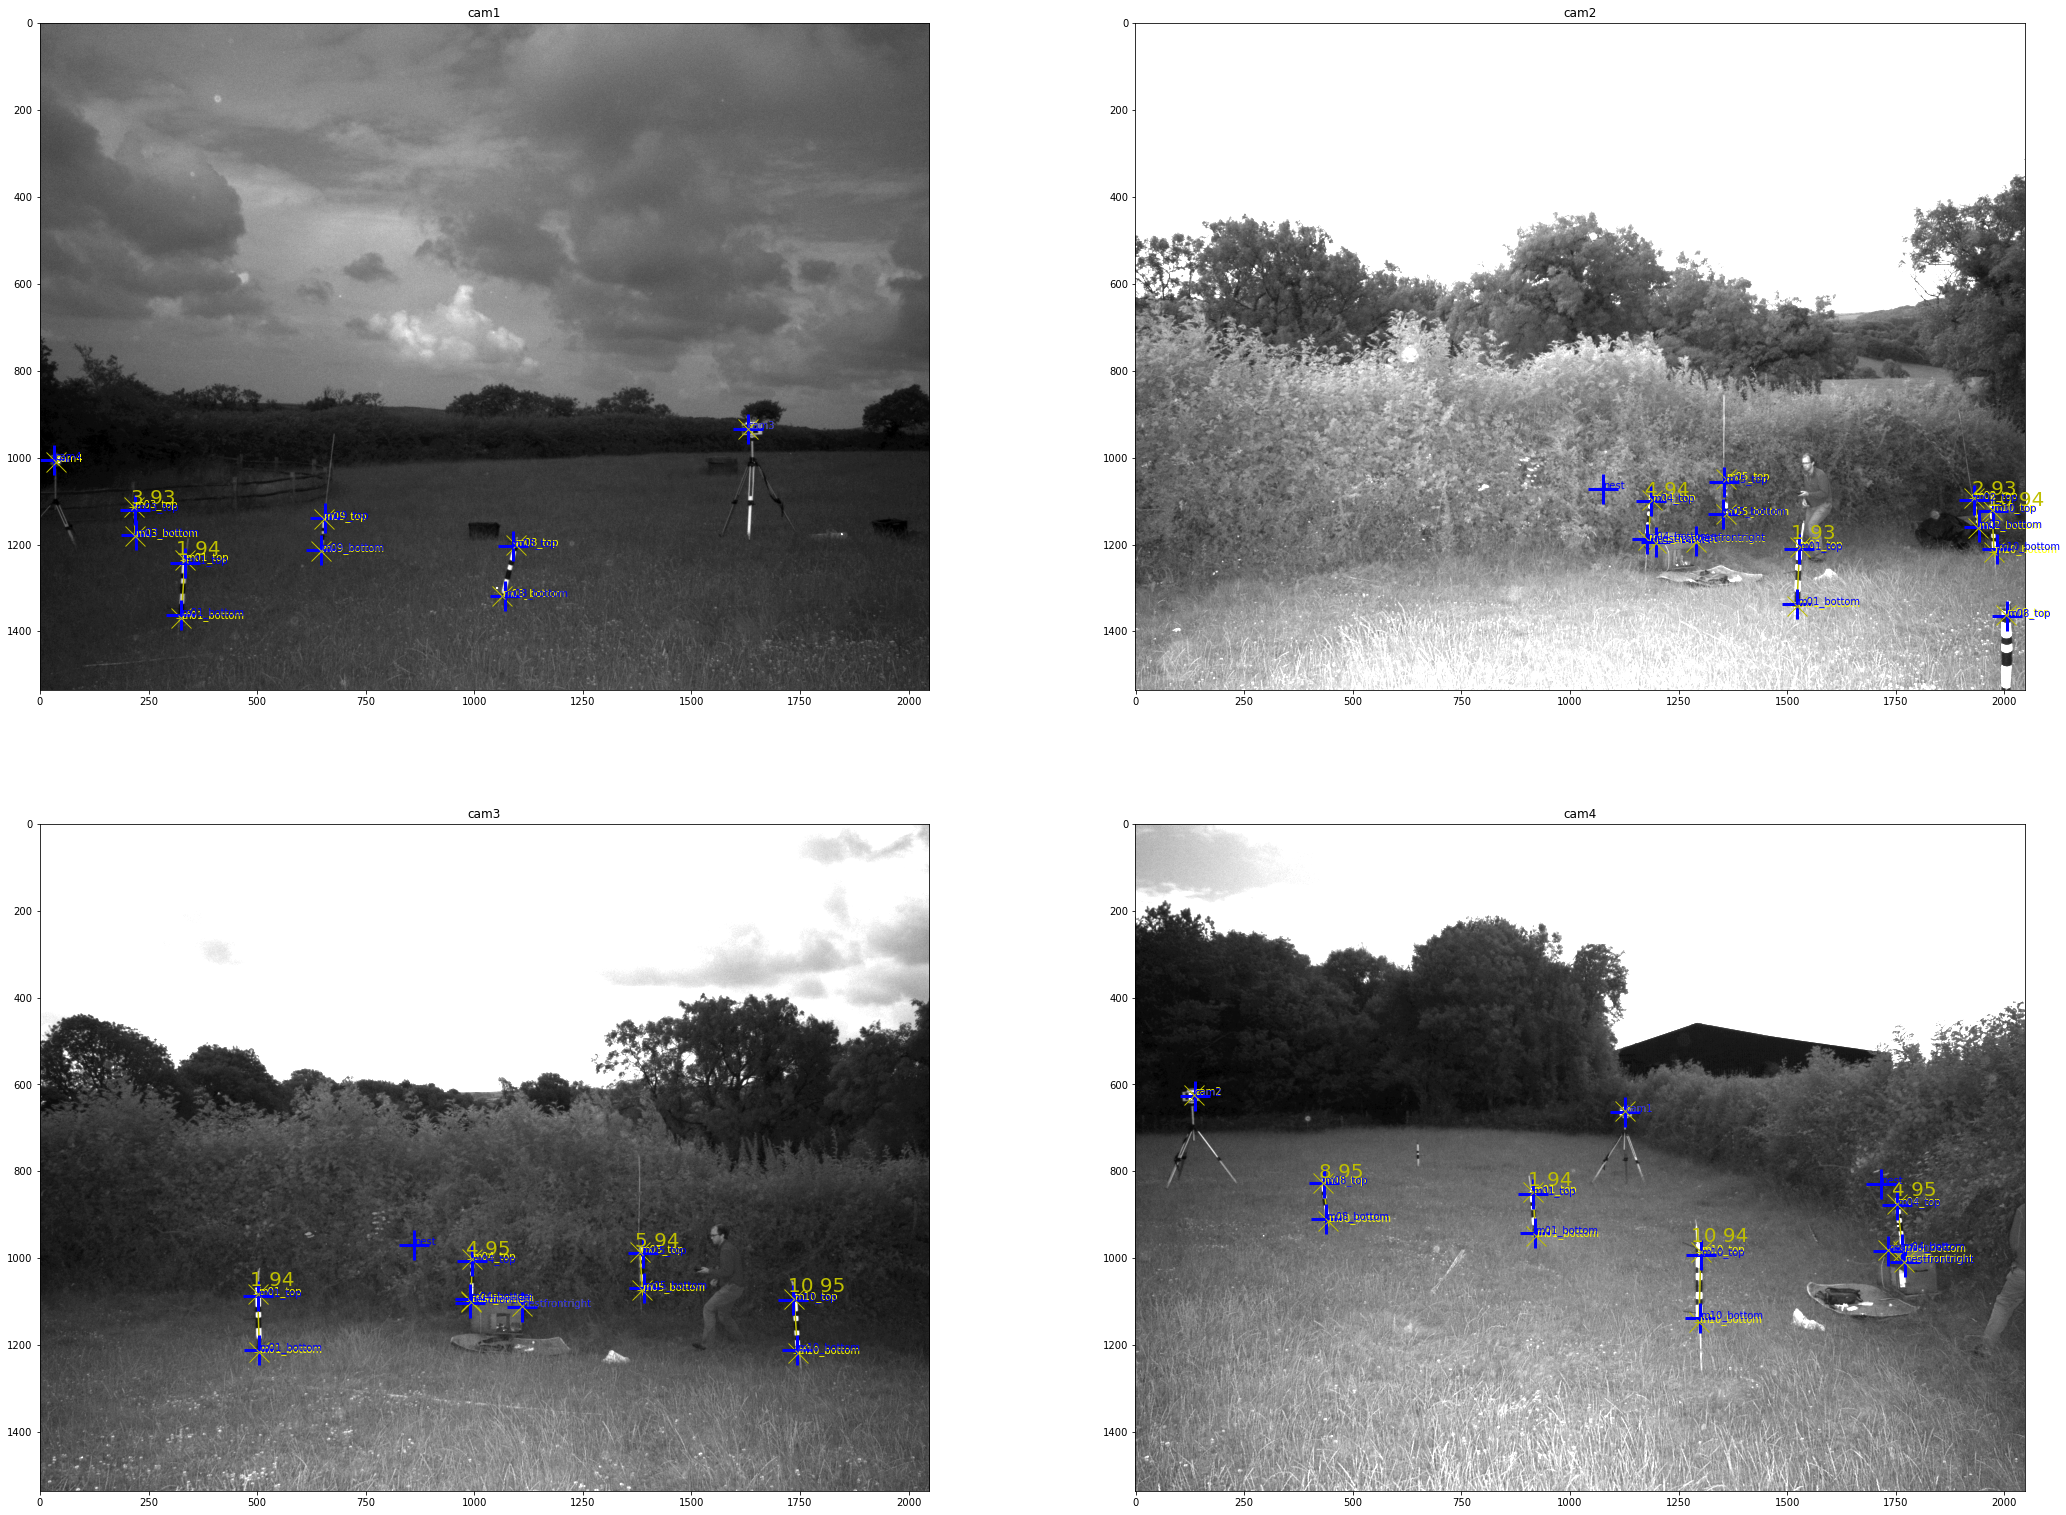

In [47]:
plt.figure(figsize=[36,27])
for i,cam in enumerate(a.cam_photos):
    plt.subplot(2,2,i+1)
    a.draw_found(cam,20,draw_3d_location=True)
    plt.title(cam)    
plt.savefig('/home/mike/Desktop/temp.png')

# 3. Manual Labelling

Load the labelling. We've run the web tool (more details to follow) to find the dots,...

In [48]:
import json
#detections = json.load(open('/home/mike/Documents/Research/beelabel/labelling/bee_track.json'))
detections = json.load(open('/'.join(a.config_filename.split('/')[:-1])+'/bee_track.json'))

#use the filename...
#from datetime import datetime
#def getseconds(st):
#    return (datetime.strptime((re.findall('.*_([0-9]{2}:[0-9]{2}:[0-9]{2}.[0-9]{6})',d['fn'])[0]),'%H:%M:%S.%f')-datetime(1900,1,1)).total_seconds()

#load and get the triggertime value
import datetime
import re
def getseconds(st):
    temp = np.load(st,allow_pickle=True)    
    #if 'estimated_true_triggertime' in temp['record']:
    #    return temp['record']['estimated_true_triggertime']
    
    timestampfromfn = datetime.datetime.strptime(re.findall('([0-9]{8}_[0-9]{2}:[0-9]{2}:[0-9]{2}.[0-9]{6})',st)[0],'%Y%m%d_%H:%M:%S.%f').timestamp()
    #timestampfromfiledata = temp['record']['triggertime']
    #print(timestampfromfn-timestampfromfiledata)
    return timestampfromfn
  
observations = []
obstimes = []
obsrecord = []
camids = [c for c in a.cam_photos]
for cam, det in detections.items():
    for num, ds in det.items():
        for d in ds:
            if d['fn'] in sum(a.image_filenames.values(),[]):
                origin, vect = a.get_vector_pixel(a.newitems[camids[int(cam)]],np.array([d['x'], d['y']]))
                observations.append(np.r_[origin, vect, d['confidence']])
                obsrecord.append([camids[int(cam)],d['x'],d['y'],d['confidence']])
                obstimes.append(getseconds(d['fn']))
observations = np.array(observations)
obstimes = np.array(obstimes)
obsrecord = np.array(obsrecord)

In [49]:
tsort = np.argsort(obstimes)
observations = observations[tsort,:]
obsrecord = obsrecord[tsort,:]
obstimes = obstimes[tsort]
obstimes = obstimes-obstimes[0]

#keep = (observations[:,-1]==100)
#observations = observations[keep,:]
#obstimes = obstimes[keep]
#obsrecord = obsrecord[keep,:]

#Just look at first .. seconds
keep = (obstimes<10)
observations = observations[keep,:]
obstimes = obstimes[keep]
obsrecord = obsrecord[keep,:]

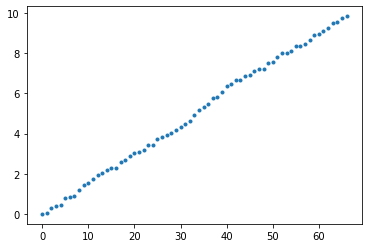

In [50]:
plt.plot(obstimes,'.')

# Gaussian Process Modelling

In [51]:
import trajectory_gp as tgp

In [101]:
Z,mu,scale = tgp.run(obstimes,observations,500,learning_rate=0.1,likenoisescale=0.05,Nind=15)

0 [1858182.1]
20 [1295833.8]
40 [886540.]
60 [590836.8]
80 [385547.53]
100 [246959.6]
120 [155495.9]
140 [96181.8]
160 [58493.21]
180 [35286.96]
200 [20991.65]
220 [12581.82]
240 [7766.63]
260 [5030.77]
280 [3507.71]
300 [2612.93]
320 [2170.6]
340 [1893.14]
360 [1731.54]
380 [1627.61]
400 [1577.5]
420 [1547.35]
440 [1527.89]
460 [1507.95]
480 [1499.72]


In [102]:
#compute the predictions for some test points in Xtest.
testsize = 200
Xtest = tgp.buildinputmatrix(0,10,testsize)
Kzz,Kxtxt,Kxtz,Kzxt,KzzinvKzxt,KxtzKzzinv,KxtzKzzinvKzxt = tgp.compute_matrices(Xtest,Z,1e-6)
qf_mu = (KxtzKzzinv @ mu)[:,0]
qf_cov = Kxtxt - KxtzKzzinvKzxt + KxtzKzzinv @ tgp.getcov(scale) @ KzzinvKzxt

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
C = tf.transpose(tf.concat([qf_cov[i::testsize,i::testsize][:,:,None] for i in range(testsize)],axis=2),[2,0,1])
M = tf.transpose(tf.reshape(qf_mu,[3,testsize]),[1,0])
Nsamps = 1000
jitter = tf.eye(3)*1e-5
samps = tfd.MultivariateNormalFullCovariance(M,(C+jitter)).sample(Nsamps)

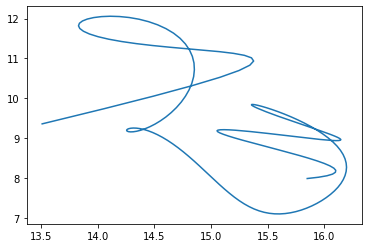

In [103]:
plt.plot(M[:,0],M[:,1])

In [104]:
#samps = tf.transpose(tf.reshape(tfd.MultivariateNormalFullCovariance(qf_mu,(qf_cov+tf.eye(qf_cov.shape[0])*1e-2)/1.0).sample(100),[Nsamps,3,testsize]),[0,2,1])

In [105]:
printtimestep = 1
conf_threshold = 0.15
route = np.c_[qf_mu[(0*testsize):((0+1)*testsize)],qf_mu[(1*testsize):((1+1)*testsize)],qf_mu[(2*testsize):((2+1)*testsize)]]

In [106]:
npsamps =tf.transpose(samps,[1,0,2]).numpy()

In [107]:
starttime,endtime = tuple(Xtest[:,0].numpy()[[0,testsize-1]])

In [108]:
vs = []
for i in range(testsize):
    vs.append(np.linalg.norm(np.diag(qf_cov)[i::testsize]))
vs = np.array(vs)

In [109]:
for itname, item in a.newitems.items():
    print(itname)

cam2
cam3
cam4
m09_top
m09_bottom
m02_top
m02_bottom
m03_top
m03_bottom
m10_top
m10_bottom
m05_top
m05_bottom
m08_top
m08_bottom
m01_top
m01_bottom
nest
m04_top
m04_bottom
cam1
nestfrontleft
nestfrontright


In [110]:

import ipyvolume as ipv

ipv.clear()
def plot(mat,color='green'):
    return ipv.plot(mat[...,0],mat[...,1],-mat[...,2],color=color)
def scatter(mat,size=1.5,marker='sphere',color='black'):
    return ipv.scatter(mat[...,0],mat[...,1],-mat[...,2],size=size,marker=marker,color=color)
def plotlines(start,end):
    for s,e in zip(start,end):
        ipv.plot([s[0],e[0]],[s[1],e[1]],[-s[2],-e[2]])
until = testsize
fr = 0
until = testsize-1

temp = [np.array([route[j,ax] for j in range(fr,until)]) for ax in range(3)]
pl = []
#pl.append(ipv.scatter(temp[0][:,None],temp[1][:,None],temp[2][:,None],size=3,marker='sphere',color='red'))
pl.append(ipv.scatter(npsamps[fr:until,:,0:1],npsamps[fr:until,:,1:2],-npsamps[fr:until,:,2:3],size=1,marker='sphere',color='black'))

#for t,obs in zip(obstimes,observations):
#    if (t>starttime) and (t<endtime):
#        plot(np.c_[obs[:3],obs[:3]+20*obs[3:6]].T)

for itname,item in a.newitems.items():      
    if 'cam' in itname:
        scatter(item['coords'][None,:],size=10,marker='diamond')
        continue
    if 'nestfront' in itname:        
        scatter(item['coords'][None,:],size=5,color='green')
        continue
    if 'nest' in itname:
        continue
    scatter(item['coords'][None,:],size=5)
        

for i in range(until):
    err = np.sqrt(vs[i])
    c = 2*err #0 = black, 1=white
    if c>1: c = 1
    if err<4*conf_threshold:
        plot(np.c_[qf_mu[i::testsize],qf_mu[i+1::testsize]].T,color=[c]*3)
#ipv.plot(qf_mu[(0*testsize+fr):(0*testsize+until)],qf_mu[(1*testsize+fr):(1*testsize+until)],qf_mu[(2*testsize+fr):(2*testsize+until)],'black')
box = 2
centre = qf_mu[10::testsize]
ipv.xlim(centre[0]-box,centre[0]+box)
ipv.ylim(centre[1]-box,centre[1]+box)
ipv.zlim(centre[2]-box*2+1,centre[2]+1)

ipv.animation_control(pl)
ipv.show()

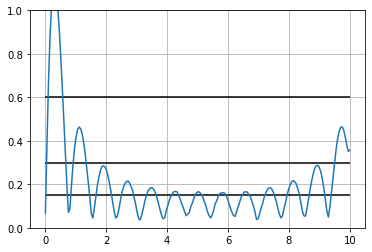

In [112]:
plt.plot(Xtest[:testsize,0],np.sqrt(vs))
#plt.plot(np.sqrt(vs))
plt.ylim([0,1**2])
plt.hlines(conf_threshold,0,Xtest[-1,0])
plt.hlines(2*conf_threshold,0,Xtest[-1,0])
plt.hlines(4*conf_threshold,0,Xtest[-1,0])
plt.grid()

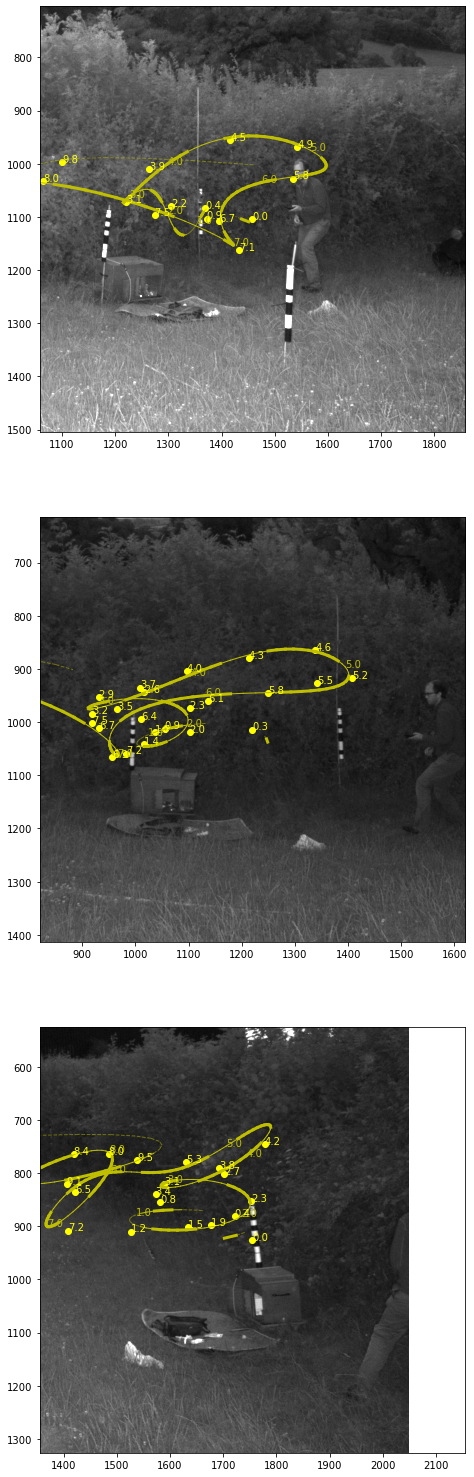

In [113]:
plt.figure(figsize=[18/2,18*2])

for i,cam in enumerate(a.cam_photos):
    if i==0: continue
    plt.subplot(4,1,i+1)
    photo = a.cam_photos[cam]
    
    plt.imshow(photo,cmap='gray')
    plt.clim([0,30])

    #draw axes
    axescoords = route[0,:]
    axescoords = np.tile(axescoords[None,:],[4,1])
    axescoords[1:,:] += np.eye(3)
    axescoords
    axes2dcoords = a.get_pixel_loc(a.newitems[cam],axescoords)
    #for i in range(1,4):
    #    plt.plot(axes2dcoords[[0,i],0],axes2dcoords[[0,i],1],'y-')
    #    plt.text(axes2dcoords[i,0]-5,axes2dcoords[i,1]-5,['x','y','z'][i-1],color='y',fontsize=20)
    
    
    mp_pixels =a.get_pixel_loc(a.newitems[cam],route)
    #plt.plot(mp_pixels[:,0],mp_pixels[:,1],'y-')
    keep = []
    lasttime = starttime
    detectedxys = (obsrecord[obsrecord[:,0]==cam,1:3]).astype(int)
    detectedtimes = obstimes[obsrecord[:,0]==cam]
    limbox = 400
    limx0,limx1 = detectedxys[0,0]-limbox,detectedxys[0,0]+limbox
    limy0,limy1 = detectedxys[0,1]+limbox,detectedxys[0,1]-limbox
    #limx0,limx1 = 0,photo.shape[1]
    #limy0,limy1 = photo.shape[0],0
    
    for i in range(len(mp_pixels)-1):
        p = mp_pixels[i,:]
        pn = mp_pixels[i+1,:]
        lw = 0
        alpha = 0
        lstyle = '-'
        if vs[i]<(4*conf_threshold)**2: 
            lw = 1
            lstyle = '--'
            alpha = 0.5
        if vs[i]<(2*conf_threshold)**2: 
            lw = 1
            lstyle = '-'
            alpha=1
        if vs[i]<conf_threshold**2: 
            lw = 3
            lstyle = '-'
            alpha=1
            
        
        plt.plot([p[0],pn[0]],[p[1],pn[1]],'y'+lstyle,lw=lw,alpha=alpha)
        
        if Xtest.numpy()[i,0]>lasttime+printtimestep:
            lasttime += printtimestep
            if (p[0]>limx0) and (p[0]<limx1) and (p[1]>limy1) and (p[1]<limy0):
                if vs[i]<(4*conf_threshold)**2:
                    plt.text(p[0],p[1],"%0.1f" % (lasttime),color='y')
    plt.xlim([0,photo.shape[1]])
    plt.ylim([photo.shape[0],0])
    
    for t,xy in zip(detectedtimes,detectedxys):
        if (t>=starttime) and (t<=endtime):
            plt.scatter(xy[0],xy[1],color='yellow')
            if (xy[0]>limx0) and (xy[0]<limx1) and (xy[1]>limy1) and (xy[1]<limy0):
                plt.text(xy[0],xy[1],"%0.1f" % t,color='yellow')
                pass
    
    
    plt.xlim([limx0,limx1])
    plt.ylim([limy0,limy1])
    
    
plt.savefig('example3.pdf')

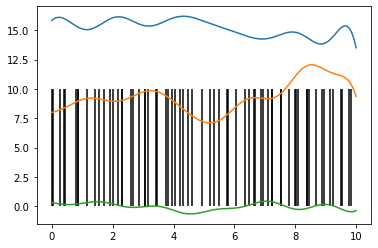

In [114]:
plt.plot(Xtest[:testsize,0],np.reshape(qf_mu,[3,testsize]).T)
plt.vlines(obstimes,0,10)
#plt.xlim([0,2])

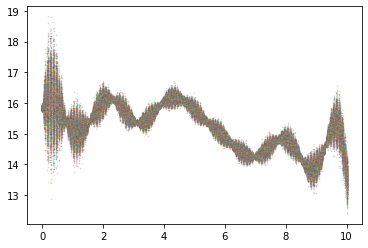

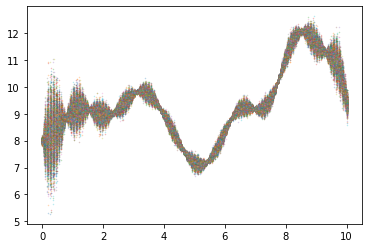

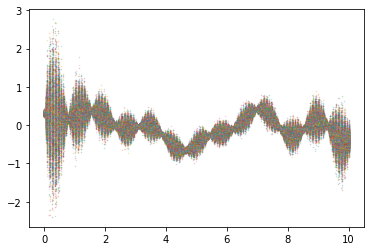

In [115]:
for ax in [0,1,2]:
    plt.figure()
    plt.plot(Xtest[:(testsize),0],(tf.transpose(samps[:,:,:],[1,0,2])[:,:,ax]),'.',markersize=1,alpha=0.3);

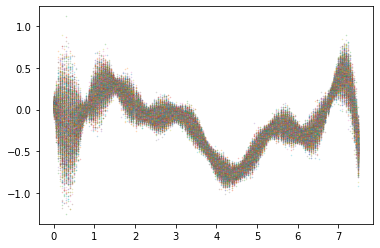

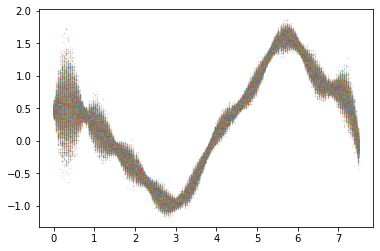

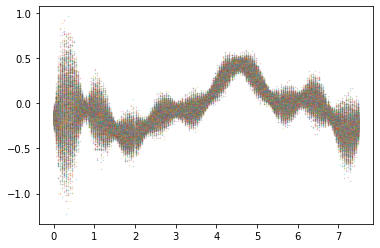

In [116]:
gap = 50
for ax in [0,1,2]:
    plt.figure()
    plt.plot(Xtest[:(testsize-gap),0],(tf.transpose(samps[:,gap:,:]-samps[:,:-gap,:],[1,0,2])[:,:,ax])/(gap*(Xtest[1,0]-Xtest[0,0])),'.',markersize=1,alpha=0.3);

(0.0, 2.0)

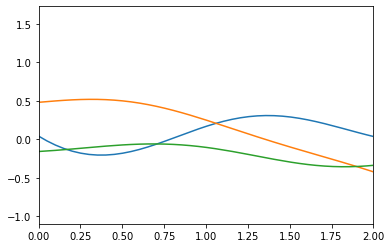

In [117]:
gap = 50
plt.plot(Xtest[:(testsize-gap),0],((np.reshape(qf_mu,[3,testsize])[:,gap:])-(np.reshape(qf_mu,[3,testsize])[:,:-gap])).T/(gap*(Xtest[1,0]-Xtest[0,0])).numpy())
#plt.vlines(obstimes,0,10)
plt.xlim([0,2])